# **Avaliação de modelos de machine learning**

Neste notebook foram avaliados dois algoritmos de classificação diferentes para resolver o problema apresentado no [notebook](https://github.com/camilasp/Projeto_Previsao_UTI/blob/master/notebooks/Machine_learning_na_avaliacao_pacientes_com_COVID_19.ipynb) principal.

Os modelos de classificação implementados e avaliados foram o **Random Forest Classifier** e o **SVC** (C-Support Vector Classification). Foram realizados  testes com diferentes parâmetros, selecionando os que fizeram com que o modelo tivesse as melhores métricas.

Além disso, o DummyClassifier foi utilizado a título de comparação.



As métricas utilizadas para a avaliação foram a *acurácia*, *precisão*, *recall* e  a *curva roc_auc*. Mais detalhes sobre estas métricas no notebook principal.


### **1. Importando as bibliotecas necessárias:**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, precision_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from funcoes import plota_roc_curve, roda_modelos


### **2. Importando os dados:**

In [7]:
dados_limpos = pd.read_csv('C:/Users/camil/Jupyter Projects/Projeto_Sirio/dados/dados_modelos.csv')

### **3. Divisão dos dados entre treino e teste**

In [8]:
colunas = dados_limpos.columns
y = dados_limpos["ICU"]
X = dados_limpos[colunas].drop(["ICU"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state= 55596 )

Agora vou implementar os modelos, testando alguns parâmetros e analisando a princípio a acurácia, precisão e o recall, para ter uma ideia do desempenho.

### **4. Modelos**

Testei o Random Forest Classifier e o SVC. O dummy classifier foi implementado para servir como parâmetro de comparação da qualidade dos meus modelos.

Para selecionar os parâmetros a serem testados foi feita a leitura da descrição dos parâmtros na documentação do [scikit-learn](https://scikit-learn.org), procurando entender quais deles tinham uma maior chance de alterar os resultados, levando em consideração as características dos dados analisados e do problema a ser resolvido.

Mais testes não foram feitos por falta de tempo e por ter obtido resultados interessantes com os poucos testes feitos. Entretanto, acredito que com mais testes e usando o [GridSearch](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html), modelos com desempenho ainda melhor poderiam ter sido obtidos.

**4.1. Dummy Classifier**

O DummyClassifier é um classificador que usa regras simples e deve ser usado apenas como comparativo com modelos classificadores mais eficientes.

In [9]:
modelo_dummy = DummyClassifier(random_state=55596, strategy= 'most_frequent')
modelo_dummy.fit(X_train, y_train)

previsao_dummy = modelo_dummy.predict(X_test)


**Métricas:**

In [10]:
accuracy_score(y_test, previsao_dummy)

0.6486486486486487

In [11]:
precision_score(y_test, previsao_dummy, zero_division=1)

1.0

In [12]:
recall_score(y_test, previsao_dummy)

0.0

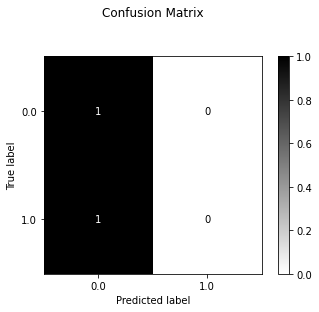

In [13]:
plot_confusion_matrix(modelo_dummy, X_test, y_test, normalize='true', cmap =plt.cm.gist_yarg)
plt.title('Confusion Matrix', pad = 40)
plt.show()

Como a estratégia escolhida foi a 'most frequent' o modelo_dummy vai classificar todos os pacientes da amostra teste como pertencentes a classe mais frequente, que é o 0 (não precisou de UTI). Na matrix de confusão percebemos que não há dados na predicted label 1 e que o modelo acertou em 100% das vezes a classificação dos pacientes que não foram para UTI (true label 0 x predicted label 0) e errou em 100% das vezes a classificação dos pacientes que precisavam de UTI( True label 1 X predicted label ).

**4.2. Random Forest Classifier**

O Random Forest é um algoritmo de aprendizagem supervisionada que cria uma floresta de um modo aleatório. A floresta  é formada por um conjunto de árvores de decisão e a previsão do modelo vai sair da combinação dos resultados individuais dessas árvores.

Os parâmetros selecionados para os testes foram:

 * n_estimators{int, default=100}: o número de árvores no modelo. Em geral, uma quantidade elevada de árvores aumenta a performance e torna as predições mais estáveis. Entretanto, quanto maior a quantidade de árvores, mais lento o modelo fica, por isso, tomei cuidado para não usar valores muito altos;
 
 
 * criterion{“gini”, “entropy”}, default=”gini”: mede a qualidade das divisões na árvores(nós);
 
 * min_samples_leafint or float, default=1: indica o número mínimo de folhas que devem existir em uma dada árvore;
 
 * class_weight{“balanced”, “balanced_subsample”}, dict or list of dicts, default=None. Determina o peso das classes. Como no caso do dataset utilizado há desbalanço entre as classes da variável alvo, achei que seria um parâmetro importante para melhorar a performance do modelo.

Fiz os testes e fui combinando os parâmetros que pareciam proporcionar os efeitos mais positivos, até obter o modelo que teve a melhor performance, que mostro a seguir:

In [14]:
modelo_random_forest= RandomForestClassifier(n_estimators= 250, random_state=55596, min_samples_leaf=10, class_weight = 'balanced') 
modelo_random_forest.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', min_samples_leaf=10,
                       n_estimators=250, random_state=55596)

In [17]:
 predicao_modelo_randomf = modelo_random_forest.predict(X_test)

**Métricas:**

In [18]:
accuracy_score(y_test, predicao_modelo_randomf)

0.7567567567567568

In [19]:
precision_score(y_test, predicao_modelo_randomf)

0.6818181818181818

In [20]:
recall_score(y_test, predicao_modelo_randomf)

0.5769230769230769

Este modelo não teve resultados muito bons.  O recall, que mostra que dentre os pacientes que precisaram de UTI, o modelo foi capaz de identificar corretamente 57%. 

Abaixo o report que mostra as métricas tanto para classe 1 (UTI) quanto para classe 0.

In [21]:
print(classification_report(y_test, predicao_modelo_randomf))

              precision    recall  f1-score   support

         0.0       0.79      0.85      0.82        48
         1.0       0.68      0.58      0.62        26

    accuracy                           0.76        74
   macro avg       0.74      0.72      0.72        74
weighted avg       0.75      0.76      0.75        74



In [ ]:
plt.rcParams.update({'figure.figsize': (8.0, 8.0)})
plt.rcParams.update({'font.size': 13})

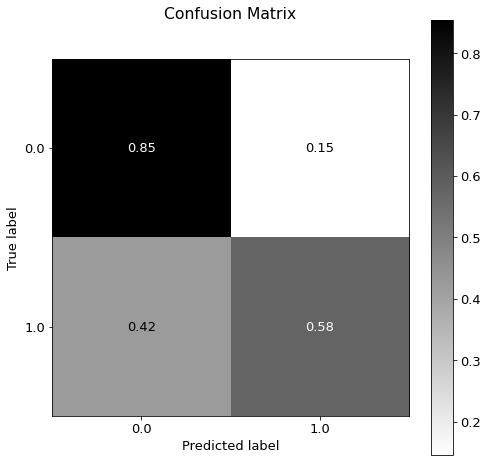

In [23]:
plot_confusion_matrix(modelo_random_forest, X_test, y_test, normalize='true', cmap =plt.cm.gist_yarg)
plt.title('Confusion Matrix', pad = 40)
plt.show()


A confusion matrix mostra a performance do modelo de acordo com os 4 possíveis resultados da classificação. Vemos que p modelo teve sucesso em classificar corretamente a grande maioria dos pacientes tanto na classe 1 (92%) quanto na classe 0 (88%).

**4.3. SVC**

Os parâmetros selecionados para testes foram:

* class_weight{“balanced”, “balanced_subsample”}, dict or list of dicts, default=None. Determina o peso das classes. Como no caso do dataset utilizado há desbalanço entre as classes da variável alvo, achei que seria um parâmetro importante para melhorar a performance do modelo;

* kernel{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}, default=’rbf’: seleciona o tipo de hiperplano utilizado para separar os dados;

* gamma{‘scale’, ‘auto’} or float, default=’scale’: É um parâmetro para kernels não lineares. Quanto mais alto o valor de gamma, mais o algoritmo tentará se ajustar aos dados de treino.

*probability*: não foi usado para os testes, porém posteriormente foi necessário adicioná-lo para permitir a avaliação do modelo.

In [24]:
modelo_svc= svm.SVC(kernel='poly', random_state=55596, class_weight='balanced',probability=True, gamma=0.1) 
modelo_svc.fit(X_train, y_train)


SVC(class_weight='balanced', gamma=0.1, kernel='poly', probability=True,
    random_state=55596)

In [25]:
previsao_svc = modelo_svc.predict(X_test)

**Métricas:**

In [26]:
accuracy_score(y_test, previsao_svc)

0.6351351351351351

In [27]:
precision_score(y_test, previsao_svc)

0.4827586206896552

In [28]:
recall_score(y_test, previsao_svc)

0.5384615384615384

In [29]:
print(classification_report(y_test, previsao_svc))

              precision    recall  f1-score   support

         0.0       0.73      0.69      0.71        48
         1.0       0.48      0.54      0.51        26

    accuracy                           0.64        74
   macro avg       0.61      0.61      0.61        74
weighted avg       0.65      0.64      0.64        74



Este modelo também não teve métricas tão boas, porém todas elas estão abaixo do modelo random forest. O recall da classe 1 por exemplo foi de 54%, enquanto que o random forest conseguiu 57%. A precisão foi de 48% para classe 1, enquanto o random forest conseguiu 68%.

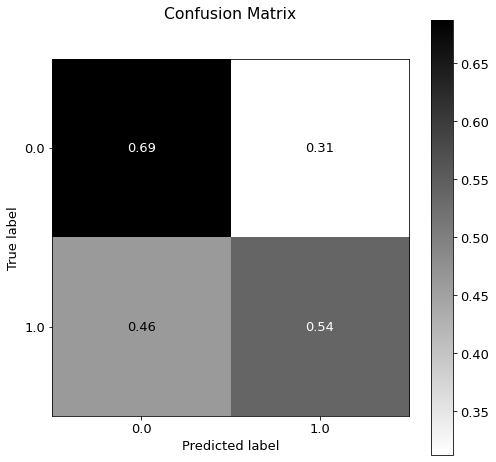

In [30]:
plot_confusion_matrix(modelo_svc, X_test, y_test, normalize='true', cmap =plt.cm.gist_yarg)
plt.title('Confusion Matrix', pad = 40)
plt.show()

**Seleção das features mais importantes**

Vou usar o meu modelo que teve os melhores resultados - o **Random Forest Classifier** - para verificar qual **a importância das features para este modelo** e escolher as features mais importantes para tentar melhorar seu desempenho ainda mais.

In [31]:
for feature in zip(X_train, modelo_random_forest.feature_importances_):
 print(feature)

('AGE_ABOVE65', 0.01883362024579424)
('GENDER', 0.011435391463302498)
('DISEASE GROUPING 1', 0.00018117288250052698)
('DISEASE GROUPING 2', 0.0)
('DISEASE GROUPING 3', 0.0)
('DISEASE GROUPING 4', 0.0)
('DISEASE GROUPING 5', 0.0)
('DISEASE GROUPING 6', 0.0)
('HTN', 0.003161559227682509)
('IMMUNOCOMPROMISED', 0.0029267251908856188)
('OTHER', 0.0007786963918356266)
('ALBUMIN_MEDIAN', 0.0)
('BE_VENOUS_MEDIAN', 0.0031631602138094137)
('BIC_VENOUS_MEDIAN', 0.0036958570619354037)
('CALCIUM_MEDIAN', 0.017921345893387754)
('CREATININ_MEDIAN', 0.07106623002357347)
('FFA_MEDIAN', 0.004534924320424512)
('GGT_MEDIAN', 0.02939957163910511)
('GLUCOSE_MEDIAN', 0.03660046164688627)
('HEMATOCRITE_MEDIAN', 0.03308770241209263)
('LACTATE_MEDIAN', 0.018998188597628734)
('LEUKOCYTES_MEDIAN', 0.03977011651500605)
('LINFOCITOS_MEDIAN', 0.0979056545920813)
('P02_VENOUS_MEDIAN', 0.007416997412318841)
('PCR_MEDIAN', 0.13553383680505587)
('PH_VENOUS_MEDIAN', 0.0034301427315634532)
('PLATELETS_MEDIAN', 0.040974653

In [32]:
plt.rcParams.update({'figure.figsize': (14.0, 12.0)})
plt.rcParams.update({'font.size': 10})

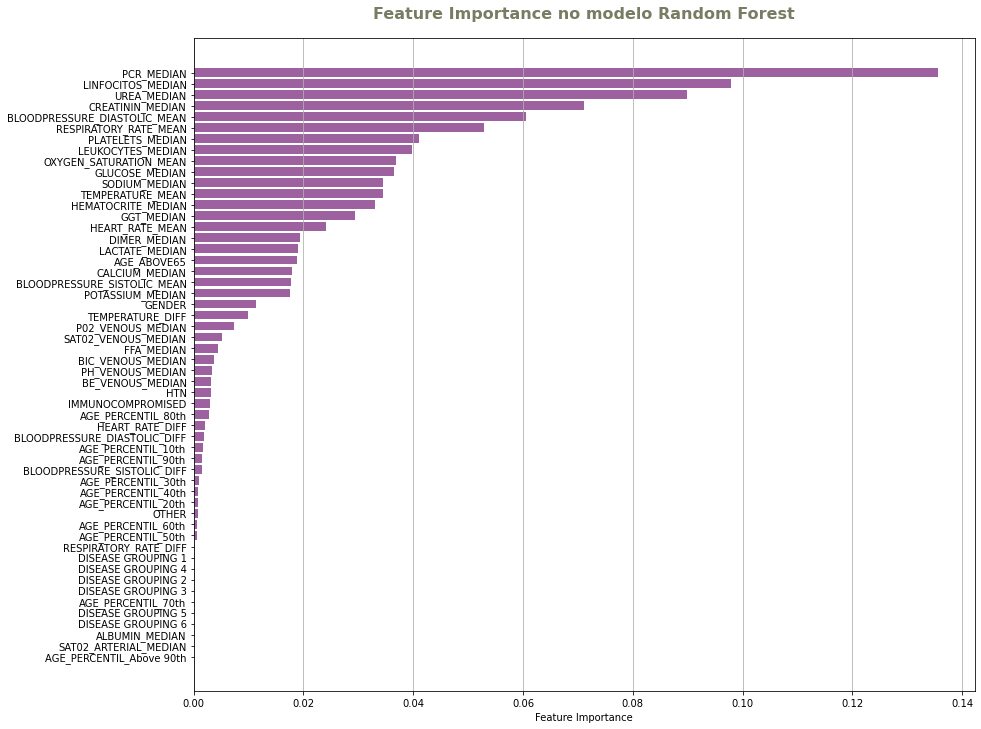

In [33]:
sorted = modelo_random_forest.feature_importances_.argsort()
plt.barh(X.columns[sorted], modelo_random_forest.feature_importances_[sorted], color= '#9D61A0')
plt.xlabel("Feature Importance")
plt.title('Feature Importance no modelo Random Forest', pad= 20, fontsize= 16, color= '#777D62', weight= 'bold', family ='sans-serif')
plt.grid(axis = 'x')
plt.show()

Pelo gráfico percebemos que os dados referentes às **comorbidades** (disease groupings) e às **faixas etárias**(age percentil) em sua grande maioria estão entre os de menor importância para o modelo avaliado.Com base no gráfico, farei a exclusão das colunas que contém esses dados e mais alguns outros que tem um coeficiente de importância muito próximo a zero.

In [34]:
colunas_selecionadas = dados_limpos.columns[:-10] #exclusão das colunas AGE_PERCENTIL

In [35]:
dados_finais = dados_limpos[colunas_selecionadas]

In [36]:
colunas_excluir= ['DISEASE GROUPING 1', 'DISEASE GROUPING 2', 'DISEASE GROUPING 3', 'DISEASE GROUPING 4','DISEASE GROUPING 6',
                   'OTHER','RESPIRATORY_RATE_DIFF','ALBUMIN_MEDIAN', 'SAT02_ARTERIAL_MEDIAN']

In [37]:
#exclusão das colunas listadas em 'colunas excluir'
for cols in colunas_excluir:
    dados_finais= dados_finais.drop(columns=[cols])

In [38]:
dados_finais

,AGE_ABOVE65,GENDER,DISEASE GROUPING 5,HTN,BE_VENOUS_MEDIAN,BIC_VENOUS_MEDIAN,CALCIUM_MEDIAN,CREATININ_MEDIAN,FFA_MEDIAN,GGT_MEDIAN,...,UREA_MEDIAN,DIMER_MEDIAN,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,TEMPERATURE_DIFF,ICU
0,1.0,0.0,1.0,0.0,-1.000000,-0.317073,0.183673,-0.868365,-0.742004,-0.945093,...,-0.836145,-0.994912,0.086420,-0.230769,-0.283019,-0.593220,-0.285714,0.736842,-1.000000,1.0
1,0.0,0.0,0.0,0.0,-1.000000,-0.317073,0.357143,-0.912243,-0.742004,-0.958528,...,-0.836145,-0.978029,-0.489712,-0.685470,-0.048218,-0.645951,0.357143,0.935673,-1.000000,1.0
2,0.0,1.0,0.0,0.0,-1.000000,-0.317073,0.326531,-0.968861,-0.194030,-0.316589,...,-0.937349,-0.978029,0.012346,-0.369231,-0.528302,-0.457627,-0.285714,0.684211,-1.000000,0.0
3,0.0,0.0,0.0,0.0,-1.000000,-0.317073,0.357143,-0.913659,-0.829424,-0.938084,...,-0.903614,-1.000000,0.333333,-0.153846,0.160377,-0.593220,0.285714,0.868421,-0.952381,0.0
4,0.0,0.0,0.0,0.0,-1.000000,-0.317073,0.357143,-0.891012,-0.742004,-0.958528,...,-0.884337,-1.000000,-0.037037,-0.538462,-0.537736,-0.525424,-0.196429,0.815789,-0.976190,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,0.0,1.0,0.0,0.0,-1.000000,-0.317073,0.326531,-0.937721,1.000000,-0.147196,...,-0.860241,-0.978029,-0.160494,-0.692308,0.339623,-0.457627,0.142857,0.736842,-1.000000,1.0
290,1.0,0.0,0.0,0.0,-1.000000,-0.317073,0.285714,-0.886766,-0.742004,-0.958528,...,-0.855422,-0.978029,-0.407407,-0.692308,-0.283019,-0.457627,-0.059524,0.526316,-0.619048,0.0
291,0.0,0.0,0.0,0.0,-1.000000,-0.317073,0.357143,-0.905166,-0.742004,-0.958528,...,-0.787952,-0.964461,0.012346,-0.384615,-0.320755,-0.457627,-0.071429,0.894737,-1.000000,1.0
292,0.0,1.0,0.0,0.0,-1.000000,-0.317073,0.357143,-0.922151,-0.742004,-0.958528,...,-0.937349,-0.978029,0.086420,-0.230769,-0.301887,-0.661017,-0.107143,0.736842,-1.000000,0.0


Nova divisão entre treino e teste com os dados_finais, para testar novamente os modelos com os dados sem as features de baixa importância para o modelo random forest:

In [39]:
colunas = dados_finais.columns
yi = dados_finais["ICU"]
Xi = dados_finais[colunas].drop(["ICU"], axis=1)
Xi_train, Xi_test, yi_train, yi_test = train_test_split(Xi, yi, stratify=yi, random_state= 55596 )

**Random Forest com features mais importantes (dados finais)**

In [61]:
#criterion entropy piorou a acuracia, min_samples_leaf= 10 melhorou muito, porém a acurácia melhorou mais ainda com 1
modelo_random_forest_2= RandomForestClassifier(n_estimators= 250, random_state=55596, min_samples_leaf=10, class_weight='balanced') 
modelo_random_forest_2.fit(Xi_train,yi_train)

RandomForestClassifier(class_weight='balanced', min_samples_leaf=10,
                       n_estimators=250, random_state=55596)

In [62]:
predicao_modelo_randomf_2 = modelo_random_forest_2.predict(Xi_test)

In [63]:
accuracy_score(yi_test, predicao_modelo_randomf_2)

0.7702702702702703

In [64]:
precision_score(yi_test, predicao_modelo_randomf_2)

0.6956521739130435

In [65]:
recall_score(yi_test, predicao_modelo_randomf_2)

0.6153846153846154

In [66]:
print(classification_report(yi_test, predicao_modelo_randomf_2))

              precision    recall  f1-score   support

         0.0       0.80      0.85      0.83        48
         1.0       0.70      0.62      0.65        26

    accuracy                           0.77        74
   macro avg       0.75      0.73      0.74        74
weighted avg       0.77      0.77      0.77        74



O mesmo modelo, só que agora sem as colunas das features de menor importância para o modelo, obteve aparentemente os mesmos resultados.

**SVC com os dados finais**

In [72]:
modelo_svc_2 = svm.SVC(gamma= 0.1, random_state=55596, kernel='poly', probability= True, class_weight='balanced')
modelo_svc_2.fit(Xi_train, yi_train)


SVC(class_weight='balanced', gamma=0.1, kernel='poly', probability=True,
    random_state=55596)

In [69]:
previsao_svc_2 = modelo_svc_2.predict(Xi_test)

In [70]:
accuracy_score(yi_test, previsao_svc_2)

0.7027027027027027

In [71]:
print(classification_report(yi_test, previsao_svc_2))

              precision    recall  f1-score   support

         0.0       0.80      0.73      0.76        48
         1.0       0.57      0.65      0.61        26

    accuracy                           0.70        74
   macro avg       0.68      0.69      0.68        74
weighted avg       0.72      0.70      0.71        74



No caso do modelo de SVC com os dados finais, o desempenho também foi pior.

**Comparando a ROC curve dos meus modelos**

A ROC curve é uma métrica de avaliação de modelos de classificação binária, como o que está sendo implementado aqui. É uma curva de probabilidade que mostra a relação da taxa de verdadeiro positivo pela taxa de falso positivo em diferentes limiareas. A área sob a curva(AUC) representa a habilidade do modelo de classificação de distinguir entre as classes.

In [73]:
prob_predict = modelo_random_forest.predict_proba(X_test)

In [74]:
fpr1, tpr1 = roda_modelos(modelo_random_forest, dados_limpos)
fpr2, tpr2 = roda_modelos(modelo_svc, dados_limpos)
fpr, tpr = roda_modelos(modelo_dummy, dados_limpos)

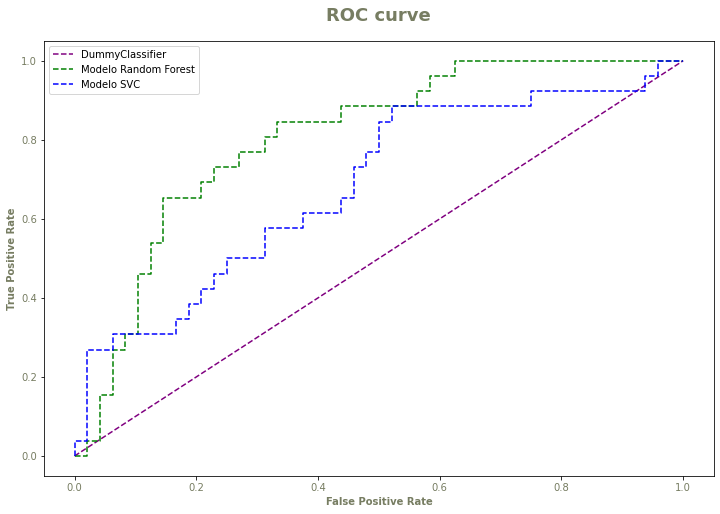

In [75]:
plota_roc_curve(fpr, tpr, fpr1, tpr1, fpr2, tpr2)


Aqui vemos a superioridade do modelo Random Forest com relação ao SVC e ao DummyClassifier.

**Validação dos modelos utilizando o cross_validate**

Para termos certeza de que temos um bom modelo, é necessário que façamos sua validação.
Para evitar de dividir a base de dados em ainda mais uma porção e dessa forma ficar com menos dados para o treinamento do modelo, temos a validação cruzada(cross-validation). 

O tipo de cross-validation utilizado será o stratified repeated k-fold. Mais detalhes sobre esse método estão descritos no [notebook principal].

A performance do modelo é a média dos valores computados em cada uma das divisões.



As métricas utilizadas serão a AUC e o recall. 

In [76]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold

In [77]:
def modelo_cv(modelo, dados, n_splits, n_repeats):

    np.random.seed(55596)
    dados = dados.sample(frac=1).reset_index(drop=True)
    colunas = dados.columns
    y = dados["ICU"]
    X = dados[colunas].drop(["ICU"], axis=1)
     
       
    cv = RepeatedStratifiedKFold(n_splits = n_splits, n_repeats=n_repeats, )
    resultados_auc=cross_validate(modelo, X, y, cv=cv, scoring='roc_auc', return_train_score=True)
    resultados_recall=cross_validate(modelo, X, y, cv=cv, scoring='recall') 
    
    
    auc_medio = np.mean(resultados_auc['test_score'])
    auc_std = np.std(resultados_auc['test_score'])
    recall_medio = np.mean(resultados_recall['test_score'])
    recall_std = np.std(resultados_recall['test_score'])
    
    print(f"Recall {recall_medio}")  
    print(f"Intervalo Recall {recall_medio - 2* auc_std} - {recall_medio + 2* auc_std}")
    print(f"AUC {auc_medio}")
    print(f"Intervalo AUC {auc_medio - 2* auc_std} - {auc_medio + 2* auc_std}")
       

Como comparação, segue a cross-validation do modelo **dummyclassifier** implementado:

In [78]:
modelo_cv(modelo_dummy, dados_limpos, 5, 10)

Recall 0.0
Intervalo Recall 0.0 - 0.0
AUC 0.5
Intervalo AUC 0.5 - 0.5


**Modelo Random Forest Classifier**

In [79]:
modelo_cv(modelo_random_forest, dados_limpos, 5, 10)

Recall 0.6361904761904762
Intervalo Recall 0.5382672977180458 - 0.7341136546629066
AUC 0.7802248865406761
Intervalo AUC 0.6823017080682456 - 0.8781480650131066


**Modelo Random Forest Classifier com dados_finais** 

Com seleção das features mais importantes

In [80]:
modelo_cv(modelo_random_forest_2, dados_finais, 5, 10)

Recall 0.6552380952380952
Intervalo Recall 0.5596476534076577 - 0.7508285370685327
AUC 0.7797764681975208
Intervalo AUC 0.6841860263670833 - 0.8753669100279583


**Modelo SVC**

In [81]:
modelo_cv(modelo_svc, dados_limpos, 5, 10)

Recall 0.5742857142857143
Intervalo Recall 0.4533541380417778 - 0.6952172905296508
AUC 0.7123369233895551
Intervalo AUC 0.5914053471456187 - 0.8332684996334916


**Modelo SVC com dados_finais**

In [82]:
modelo_cv(modelo_svc_2, dados_finais, 5, 10)

Recall 0.6038095238095239
Intervalo Recall 0.49649271133721773 - 0.7111263362818301
AUC 0.7453667953667954
Intervalo AUC 0.6380499828944892 - 0.8526836078391016


O modelo que obteve os melhores resultados foi o modelo Random Forest aplicado no dataset dados_finais, que é o dataset com a exclusão das features de pouca ou nenhuma importância para o modelo, como avaliado anteriormente. Não houve grande diferença deste com o primeiro modelo de random forest, mas por ter menos features e portanto ser mais simples, optei por escolhê-lo como modelo final.

Este modelo obteve uma taxa média de Recall de 65,52% e AUC médio de 77,98%. Seu desempenho é muito superior ao de um modelo aleatório como o dummyclassifier que teve 0% de recall e 50% de AUC. Entretanto, acredito que com uma melhor escolha dos parâmetros e testes de outros algoritmos de classificação, um modelo ainda melhor poderia ter sido construído.


In [85]:
#Salvando os dados finais em um arquivo csv na pasta de dados do projeto
dados_finais.to_csv('C:/Users/camil/Jupyter Projects/Projeto_Sirio/dados/dados_finais.csv', index= False)